## 1D Be lens with $R=100\mu$m - effective R calculation - experimental data

created: **09/08/2022**; last edited: **30/08/2022**

[rafael.celestre@esrf.eu](mailto:rafael.celestre@esrf.eu)

<hr style="border:1px solid gray">

In [1]:
# imports

# checking we are using the correct python:
import sys
print(sys.executable)
print(sys.version)
sys.path.insert(0, '../../pylibs/')

%matplotlib notebook
import matplotlib.pylab as pl

from f_index_of_refraction import index_of_refraction

import barc4plots.barc4plots as b4pt         # get barc4plots: https://gitlab.esrf.fr/celestre/barc4plots
import barc4ro.projected_thickness as b4ro   # get barc4ro: https://github.com/oasys-kit/oasys-barc4ro
import barc4ro.barc4ro as b4RO

import numpy as np
from numpy.polynomial import Polynomial
from scipy.optimize import curve_fit

/home/esrf/celestre/miniconda/envs/xog/bin/python
3.8.12 (default, Oct 12 2021, 13:49:34) 
[GCC 7.5.0]


In [2]:
# global variables

beamE = 17.035        # in keV
pix_size = 1.577  # in um
scan = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]     # angles for the scan (degrees)
dpi = 250   # for plots

mat = 'Be'
delta, beta, att_len = index_of_refraction(mat, beamE*1e3)

print('>>> %s: n = 1 - %.6e + i %.6e (att. length %.6e) at %.3f keV'%(mat, delta, beta, att_len, beamE))

>>> Be: n = 1 - 1.173637e-06 + i 2.350257e-10 (att. length 2.464331e-02) at 17.035 keV


In [3]:
def cosine(x, a, b):
     return a * np.cos(x + b)

#### experimental data

In [4]:
vv_exp = np.load('../experimental/results/1D_Be_R100um_ver_grad_exp.npy')
vv_exp_bis = np.load('../experimental/results/1D_Be_R100um_ver_grad_exp_bis.npy')

y_exp = np.load('../experimental/results/1D_Be_R100um_ver_grad_axis_exp.npy')

angle 0.0
angle 5.0
angle 10.0
angle 15.0
angle 20.0
angle 25.0
angle 30.0
angle 35.0
angle 40.0
angle 45.0
angle 50.0
angle 55.0
angle 60.0
angle 65.0


<IPython.core.display.Javascript object>


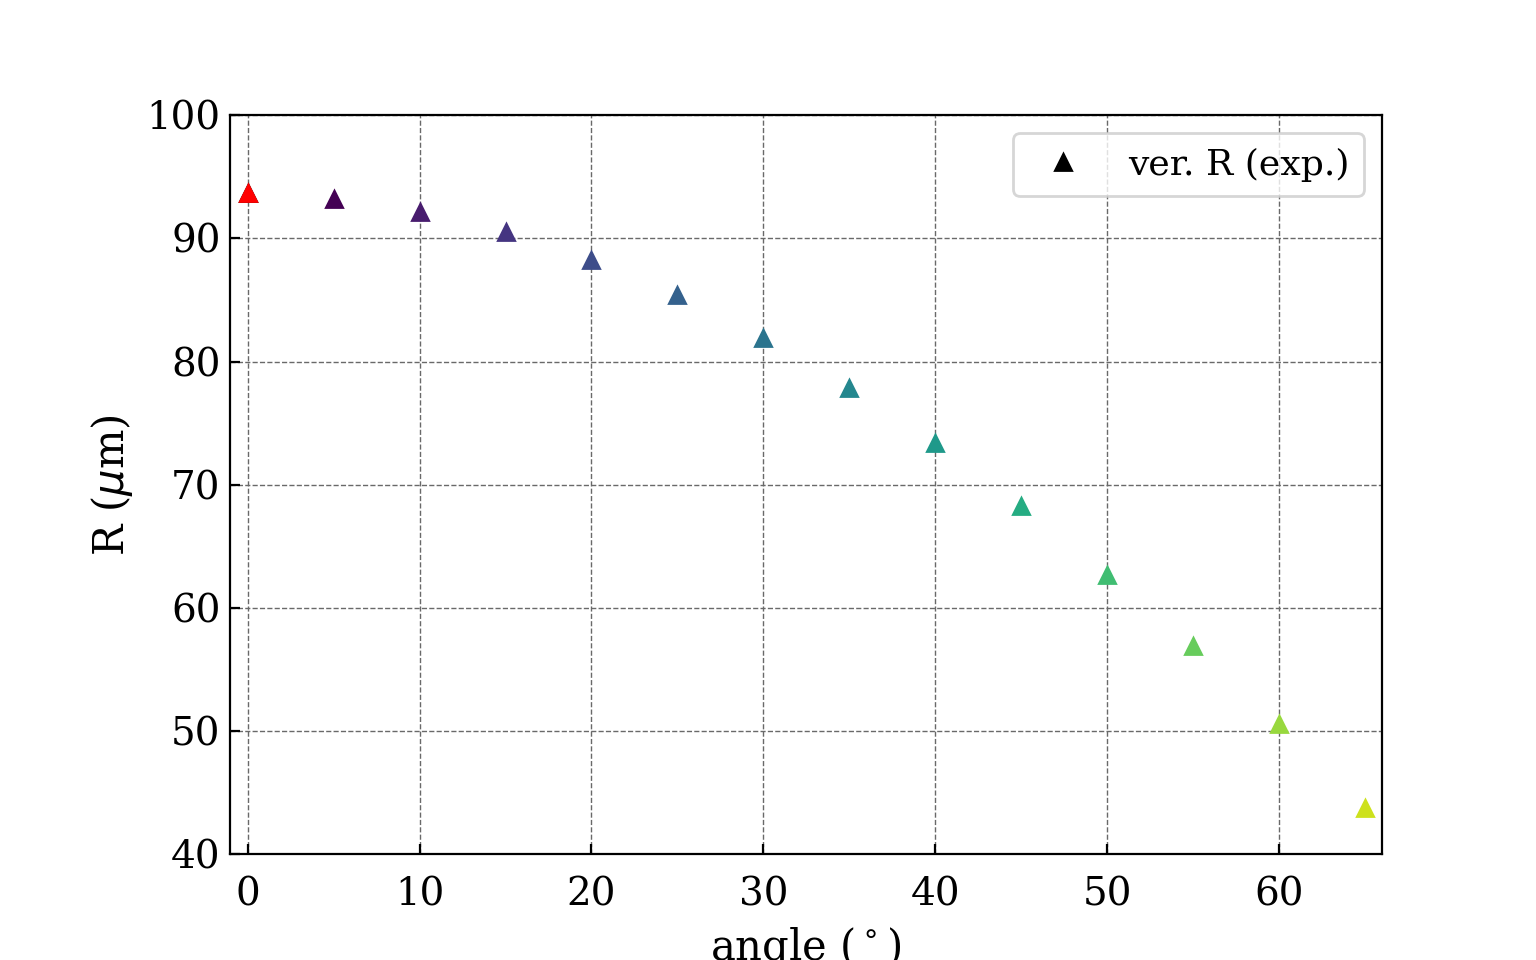

In [5]:
# radius of curvature calculation:
colors = pl.cm.viridis(np.linspace(0,1,len(scan)))
centre = np.load('./results/1D_Be_R100um_cen.npy')
dy = 100

Rv = np.zeros(len(scan))
        
k = 0

for angle in scan:
    print('angle %.1f' %angle)
    yc = int(centre[k, 0])

    p = np.polyfit(y_exp[k, yc-dy:yc+dy], vv_exp_bis[k,yc-dy:yc+dy], 1)
    Rv[k] = (1/ p[0]) * 2 * delta   
    
    image = b4pt.Image2Plot(Rv[k]*1e6, angle)
    image.AspectRatio = False
    image.LaTex = True
    image.legends = ['', 'angle ($^\circ$)', 'R ($\mu$m)']
    image.LineStyle = '^'
    image.LabelPos = 1
    image.ax_limits = [-1, 66, 40, 100]
    image.grid = True
    image.sort_class()
    if k == 0:
        image.label = 'ver. R (exp.)'
        image.ColorScheme = -1
        b4pt.plot_1D(image, Enable=False, Hold=False)
        image.label = None
        image.ColorScheme = -2
        b4pt.plot_1D(image, Enable=False, Hold=True)
    elif k == len(scan)-1:
        image.ColorScheme = colors[k-1]
        b4pt.plot_1D(image, Enable=True, Hold=True, dpi=dpi)
    else:
        image.ColorScheme = colors[k-1]
        b4pt.plot_1D(image, Enable=False, Hold=True)
    k +=1   

In [8]:
best_vals = [100,  0]  # for a * np.cos(x + c)
best_vals, covar = curve_fit(cosine, np.asarray(scan)*np.pi/180, np.asarray(Rv)*1e6, p0=best_vals)
R = Rv[0]*1e6
print('R for theta = 0: %.2f um'%R)
print('fit coefficients for: a * np.cos(x + b)')
print('>>> R = %.4f * np.cos(x + %.4f)'%(best_vals[0], best_vals[1]*180/np.pi))

perr = np.sqrt(np.diag(covar))

print(perr)

image = b4pt.Image2Plot(cosine(np.asarray(scan)*np.pi/180, best_vals[0], best_vals[1]), scan)
image.AspectRatio = False
image.LaTex = True
image.legends = ['', 'angle ($^\circ$)', 'R ($\mu$m)']
image.LineStyle = '--'
image.alpha = 0.4
image.LabelPos = 1
image.ax_limits = [-1, 66, 40, 100]
image.grid = True
image.sort_class()
image.label = 'cosine fit'
image.ColorScheme = -1
b4pt.plot_1D(image, Enable=False, Hold=False)

        
k = 0

for angle in scan:
    image = b4pt.Image2Plot(Rv[k]*1e6, angle)
    image.AspectRatio = False
    image.LaTex = True
    image.legends = ['', 'angle ($^\circ$)', 'R ($\mu$m)']
    image.LineStyle = '^'
    image.LabelPos = 1
    image.ax_limits = [-1, 66, 40, 100]
    image.grid = True
    image.sort_class()
    if k == 0:
        image.label = 'ver. R (exp.)'
        image.ColorScheme = -1
        b4pt.plot_1D(image, Enable=False, Hold=True)
        image.label = None
        image.ColorScheme = -2
        b4pt.plot_1D(image, Enable=False, Hold=True)
    elif k == len(scan)-1:
        image.ColorScheme = colors[k-1]
        b4pt.plot_1D(image, './results/1D_Be_R100um_ver_R_exp.png', Enable=True, Hold=True, dpi=dpi)
    else:
        image.ColorScheme = colors[k-1]
        b4pt.plot_1D(image, Enable=False, Hold=True)
    k +=1  


R for theta = 0: 93.69 um
fit coefficients for: a * np.cos(x + b)
>>> R = 92.8272 * np.cos(x + -2.6113)
[0.23968605 0.00388694]
>>>> file 1D_Be_R100um_ver_R_exp.png saved to disk.


<IPython.core.display.Javascript object>